Importing required libraries

In [16]:
import numpy as np #NumPy is a Python library used for working with arrays and matrices
import pandas as pd # read and writing data files
import matplotlib.pyplot as plt #Used for ploting graphs
import os,cv2 
import joblib #creating and loading files/pipeling
from sklearn.model_selection import train_test_split    #train
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 
import seaborn as sns

Loading Data

Importing kaggle dataset from downloaded repository

In [17]:
train = pd.read_csv('digit-recognizer-kaggledataset/train.csv') #data
test = pd.read_csv('digit-recognizer-kaggledataset/test.csv')

In [18]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [20]:
a=train['label'].value_counts()
sorted(a,reverse=False)
a

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
b=train["label"].unique()
b

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

Dividing dataset train.csv into train_y and train_x

mnist.load_data?

In [22]:
x = train.drop('label',axis=1)        #**x_train**: uint8 NumPy array of grayscale image data with shapes, containing the training data. Pixel values range from 0 to 255.
y = train['label'].values             #**y_train**: uint8 NumPy array of digit labels (integers in range 0-9) for the training data.

x_t = test.values                        #**x_test**: uint8 NumPy array of grayscale image data with shapes, containing the test data.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30) # 30 % testing of train.csv | 70 % training

print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))
x_train.head()


x_train => (29400, 784)
y_train => (29400,)
x_test => (12600, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the images are in square, the dimensions of the arrays are changed to (28,28) from (784)

In [23]:
# x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28)
# x_test = np.array(x_test).reshape(x_test.shape[0], 28, 28)

In [24]:
print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))

x_train => (29400, 784)
y_train => (29400,)
x_test => (12600, 784)


Data Visualization

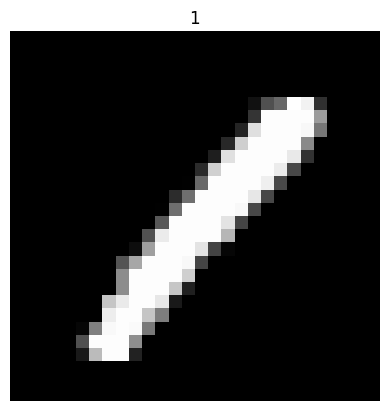

In [25]:
def display_img(i):
    img = x_train.iloc[i].values.reshape((28,28)) #train.iloc[:,1:].iloc[i].values.reshape(28,28)
    plt.imshow(#x_train[i],
            img,
            cmap = 'gray') #Greys
    plt.title(y_train[i])   #prints number shown in the image
    plt.axis('off')

display_img(9) #diplays the image at index i in train.csv

In [26]:
# #plt.imshow(train[1])
# def display_img(i):
#     #img = x_train.iloc[i].values.reshape((28,28))
#     plt.imshow(x_train[i],cmap = 'gray')
#     plt.title(y_train[i])   #prints number shown in the image
#     plt.axis('off')

# display_img(5) #diplays the image at index i in train.csv

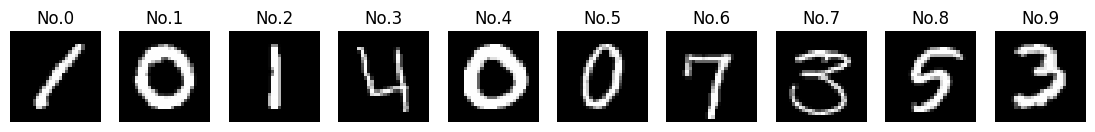

In [27]:
plt.figure(figsize=(28,28))
for i in range(10):
    plt.subplot(20, 20, i+1)
    plt.title("No." + str(i))
    plt.axis('off')
    plt.imshow(train.iloc[:,1:].iloc[i].values.reshape(28,28),cmap='gray')

In [28]:
print(y)


[1 0 1 ... 7 6 9]


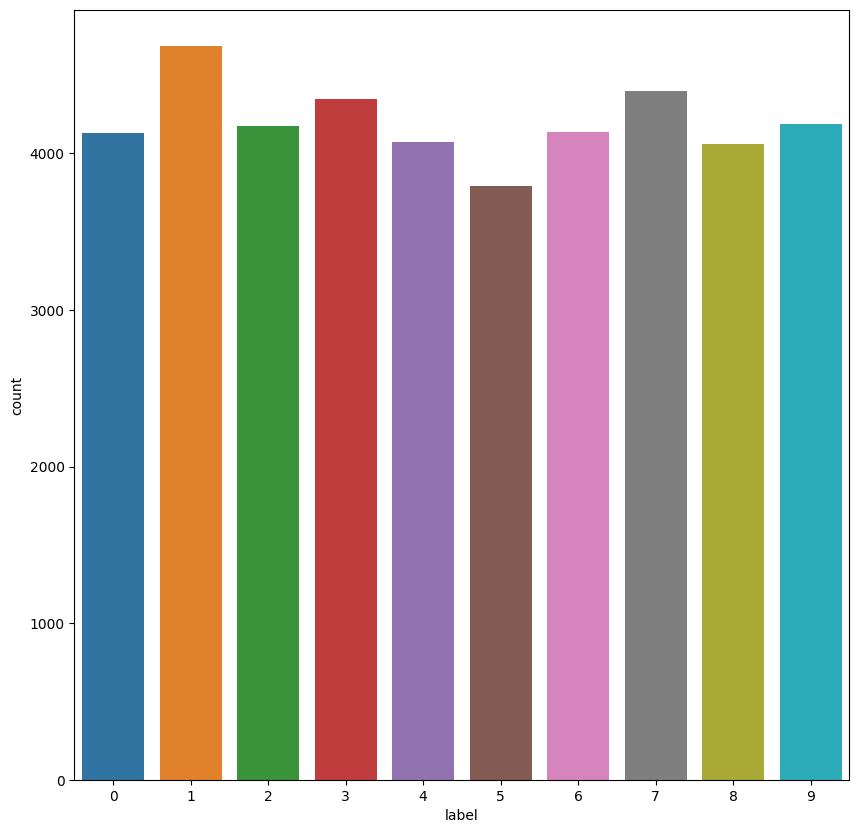

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(x="label", data=train)
plt.show()

Creating Model


In [30]:

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)
joblib.dump(classifier, "models/rfc_model")


['models/rfc_model']

Loading model

In [31]:
model_load = joblib.load("models/rfc_model")
prediction=model_load.predict(x_test)

In [32]:
print(metrics.classification_report(y_true=y_test, y_pred=prediction))
print(f"Accuracy = {metrics.accuracy_score(prediction, y_test)*100}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1209
           1       0.98      0.99      0.98      1402
           2       0.95      0.97      0.96      1261
           3       0.95      0.93      0.94      1301
           4       0.97      0.97      0.97      1262
           5       0.96      0.96      0.96      1114
           6       0.98      0.97      0.97      1222
           7       0.97      0.96      0.96      1328
           8       0.95      0.94      0.95      1259
           9       0.94      0.95      0.94      1242

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

Accuracy = 96.17460317460318


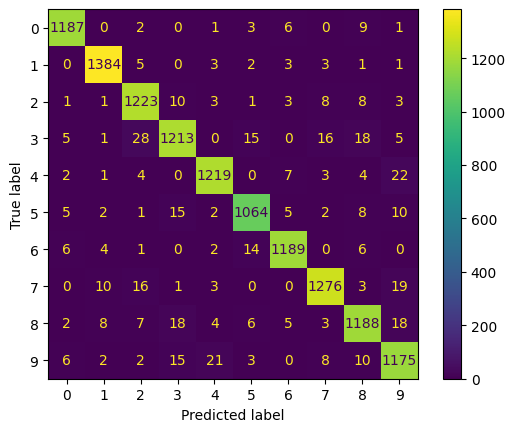

In [33]:
display_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_true=y_test, y_pred=prediction))
display_matrix.plot()
plt.show()

c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


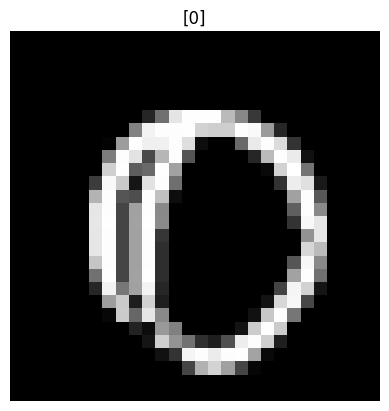

The digit is 0


In [34]:
from random import randrange
img = randrange(28001)
 
prediction_sample = model_load.predict(x_t[[img]])

plt.imshow(x_t[[img]].reshape(28,28),cmap='gray')
plt.title(prediction_sample)
plt.axis('off')
plt.show()
print("The digit is",int(prediction_sample))

In [35]:
import tkinter as tk
from tkinter import filedialog, Text
import numpy as np
import cv2

# Create a blank 28x28 white image
image = np.zeros((28, 28, 3), np.uint8)
image[:,:] = (255, 255, 255)

# Create a GUI window
root = tk.Tk()
root.title("Handwritten Number Input")

# Create a canvas widget for the user to draw on
canvas = tk.Canvas(root, width=280, height=280)
canvas.pack()

# Define a function to be called when the user starts drawing on the canvas
def start_drawing(event):
    global lastx, lasty
    lastx, lasty = event.x, event.y

# Define a function to be called when the user moves the mouse while drawing on the canvas
def draw(event):
    global lastx, lasty
    canvas.create_line((lastx, lasty, event.x, event.y), fill="black", width=10)
    # Update the starting coordinates for the next line segment
    lastx, lasty = event.x, event.y
    # Update the image with the drawn lines
    image[event.y//10, event.x//10] = (0, 0, 0)

# Bind the start_drawing and draw functions to left mouse button events on the canvas
canvas.bind("<B1-Motion>", draw)
canvas.bind("<Button-1>", start_drawing)

# Create a button to clear the canvas
clear_button = tk.Button(root, text="Clear", command=canvas.delete)
clear_button.pack()

# Create a button to save the image
def save_image():
    # Open a file dialog to choose the location to save the image
    filepath = filedialog.asksaveasfilename(defaultextension=".png")
    # Save the image to the chosen file location
    cv2.imwrite(filepath, image)

save_button = tk.Button(root, text="Save", command=save_image)
save_button.pack()

# Run the GUI
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Vanish\AppData\Local\Temp\ipykernel_6344\4018161197.py", line 45, in save_image
    cv2.imwrite(filepath, image)
cv2.error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:730: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'



old (28, 28)
new (1, 784)
The digit is 7


c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


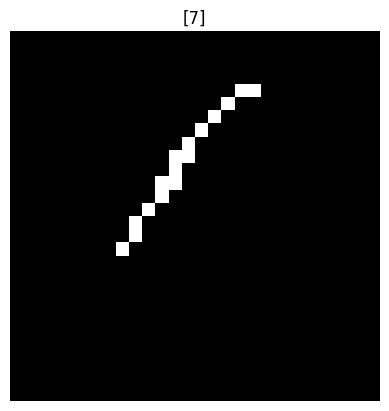

In [36]:
img_no = 1
while os.path.isfile(f"images/digit{img_no}.png"):
    try:
        img = cv2.imread(f"images/digit{img_no}.png")[:,:,0]
        nx, ny = img.shape
        print("old",img.shape)
        img = img.reshape((nx*ny))
        # img = np.array(img).reshape(img.shape[0], 784)
        img = np.invert(np.array([img]))
        print("new",img.shape)
        prediction_sample = model_load.predict(img)
        print(f"The digit is {int(prediction_sample)}")
        
        plt.imshow(img[0].reshape(28,28),cmap='gray')
        plt.title(prediction_sample)
        plt.axis('off')
    
    except:
        print("Something is wrong with the image")

    finally:
        img_no+=1